# Voluntary Problem Set

This problem set allows you to play around with concepts from class and to solve some smaller subproblems on your own.

Additional guidance is provided for concepts that did not make into our class discussion. 

# Topic: My preferred Single Factor Model (simplified Quadratic Model)

Research shows that a single factor model with time-varying beta is driving out other FF factors. My preferred model is to have a time-varying beta. The simplest way is to use rolling window regressions for getting time-varying beta.

$$
\\
$$

CAPM with a time-varying beta

$$
\\
$$

$$
r_t - r_f = \alpha + \beta_{t-1} \; \times \;  f_t + \epsilon_t, \qquad \text{with} \;  \beta_{t-1} \equiv \frac{cov_{t-1}(r_t, f_t)}{var_{t-1}(f_t)}
$$

$$
\\
$$

Notice: the timing is important, $\beta_{t-1}$ vs $f_t$ and $\epsilon_t$
 

## Time-varying Beta allows to compute interesting quantities, e.g. time-varying systematic risk, time-varying correlations and more and relates nicely to factor analysis with time-varying factor loadings.

$$
\\
$$

My reading of the literature is that accounting for time-varying factor loadings is at least as important as findings the proper factors. 
$$
\\
$$

**MU's preferred linear dependence structure**
$$
Var_{t-1}(r_t) = \beta^2_{t-1} \times Var_{t-1}(f_t) + Var_{t-1}(\epsilon_t), \qquad R^2_t:= \frac{\beta^2_{t-1} \times Var_{t-1}(f_t) }{\beta^2_{t-1} \times Var_{t-1}(f_t) + Var_{t-1}(\epsilon_t)}
$$
 





# Your Learning Points

you will practice 

- estimating time-varying beta using rolling window regressions
$$
\\
$$

- factor structure in beta
$$
\\
$$

- time-varying correlations
$$
\\
$$

- Estimating time-varying vol using SVM
 

# Tasks for a Quick Way to Get a Glance on Time-Varying Co-movement with Market
$$
\\
$$

**Notice:**  **R_d.csv** contains merged data for FF7, Rf and SP500 constituents 

$$
\\
$$

**A.1** Compute a function that computes rolling-window GLS univariate regressions for any window size. 

**A.2** Compute rolling window betas with a window size of 252 trading days. Use the (normalized) first principal component of US returns as the single index factor. That time-series is given (or can be computed if you wish so).
 
**A.3** Plot the resulting beta time-series for the hypthetical 'median' US company. Do you consider the movement to be volatile, [yes/no]? Why is the magnitude of that beta not fluctuating around 1?


**A.4** How many linear factors are necessary to explain at least 80% of variations in cross-sectional betas?


**A.5** Compute for all firms and for all time points the relative amount of systematic risk that is embedded in each stock's return. Use the pandas.describe() function to get a feeling for the dispersion of betas for firms. How realistics are results in your view?


**A.6** Use results from **A.2** to compute time-varying correlations. How many PCs are necessary to drive at least 70% of variations in cross-sectional correlations. When plotting the first principal component of correlations, can you spot why industry says 'diversification disappears when you need it most'?



**A.7** Define a crash subset to be periods that coincide with periods of 3 and more standard deviations in the underlying first principal component of return volatility. Use this definition of a crash to find the single firm that has the lowest correlation with the market during periods of market crashes. What is the business model of that firm? How realistic is the finding in you opinion?






 




In [4]:
#packages
import pandas as pd
import numpy as np
 
from sklearn.decomposition import PCA
from scipy import stats

from ipynb.fs.defs.Helper_SVM_Harvey import QLSV
from ipynb.fs.defs.Helper_FamaMacBeth import *

import matplotlib.pylab as plt

import statsmodels.api as sm

# Loading Data

In [5]:
R_d = pd.read_csv('R_d.csv',parse_dates=['Date'], index_col = 0)

In [6]:
R_d.head(1)

,Mkt-RF,SMB,HML,RMW,CMA_x,RF_x,ST_Rev,Mom,MMM,ABT,...,WDC,WY,WHR,WMB,XEL,XRX,XLNX,YUM,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.0406,0.0035,0.0214,0.0043,0.0146,0.00021,0.0163,-0.0186,-0.040547,-0.028988,...,0.174353,-0.038291,-0.03918,-0.022427,0.022765,-0.047628,-0.02299,-0.020305,-0.014534,-0.049635


In [7]:
rf = pd.DataFrame(data = R_d.iloc[:, 5])
rf.head(1)

,RF_x
Date,
2000-01-04,0.00021


In [8]:
R_d.drop(['RF_x'], axis=1, inplace=True)
R_d.head(1)

,Mkt-RF,SMB,HML,RMW,CMA_x,ST_Rev,Mom,MMM,ABT,ABMD,...,WDC,WY,WHR,WMB,XEL,XRX,XLNX,YUM,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.0406,0.0035,0.0214,0.0043,0.0146,0.0163,-0.0186,-0.040547,-0.028988,-0.024265,...,0.174353,-0.038291,-0.03918,-0.022427,0.022765,-0.047628,-0.02299,-0.020305,-0.014534,-0.049635


In [9]:
f = pd.DataFrame(data=R_d.iloc[:,0:7])
f.head(1)

,Mkt-RF,SMB,HML,RMW,CMA_x,ST_Rev,Mom
Date,,,,,,,
2000-01-04,-0.0406,0.0035,0.0214,0.0043,0.0146,0.0163,-0.0186


In [10]:
r = pd.DataFrame(data=R_d.iloc[:,7:])
r.head(1)

,MMM,ABT,ABMD,ATVI,ADBE,AMD,AES,AFL,A,APD,...,WDC,WY,WHR,WMB,XEL,XRX,XLNX,YUM,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.040547,-0.028988,-0.024265,-0.03089,-0.087618,-0.058108,-0.040463,-0.026894,-0.079464,-0.03095,...,0.174353,-0.038291,-0.03918,-0.022427,0.022765,-0.047628,-0.02299,-0.020305,-0.014534,-0.049635


# Solution A.1: 

**Task**: Compute a function that computes rolling-window GLS univariate regressions for any window size.

In [11]:
def run_gls_rollingwindow(Y, X, window_size):
    
    betas_rw = np.empty( len(X) - window_size + 1 ) # result array

    for i in range(len(Y) - window_size + 1):
        
        y_dat_fn = Y[i:i+window_size] # rolling window
        x_dat_fn = X[i:i+window_size] # rolling window

        model_fn = sm.GLS(y_dat_fn, sm.add_constant(x_dat_fn)).fit() #estimate CAPM
        betas_rw[i] = model_fn.params[1] # we are only interested in beta, not alpha
        

    return betas_rw

# Solution A.2: 

**Task**: **A.2** Compute rolling window betas with a window size of 252 trading days. Use the (normalized) first principal component of US returns as the single index factor. 

In [25]:
PC1_r = pd.read_csv('PC1_r.csv', parse_dates=['Date'], index_col=0)


In [14]:

#rw_beta_df = pd.DataFrame(index=r.index.copy())
#windowsize = 252# 60

#rw_beta_df = rw_beta_df.iloc[windowsize-1:] # drop rows where no beta will be calculated for
 
#x_dat_rw = PC1_r #is a z-score already    

#i=0
#for ticker in r: 
#    print(ticker)   
#    y_dat_rw = r[ticker] #fehler 1: -rf

#    roll_beta = run_gls_rollingwindow(stats.zscore(y_dat_rw), x_dat_rw, windowsize)
    
#    rw_beta_df[ticker] = roll_beta # save to result df

#rw_beta_df.to_csv("rw_betas_252d_df_SP500_d.csv")

rw_beta_df = pd.read_csv('rw_betas_252d_df_SP500_d.csv', parse_dates=['Date'], index_col=0)

# Solution A.3:

**Task:** Plot the resulting beta time-series for the hypthetical 'median' US company. Do you consider the movement to be volatile, [yes/no]? Why is the magnitude of that beta not fluctuating around 1?

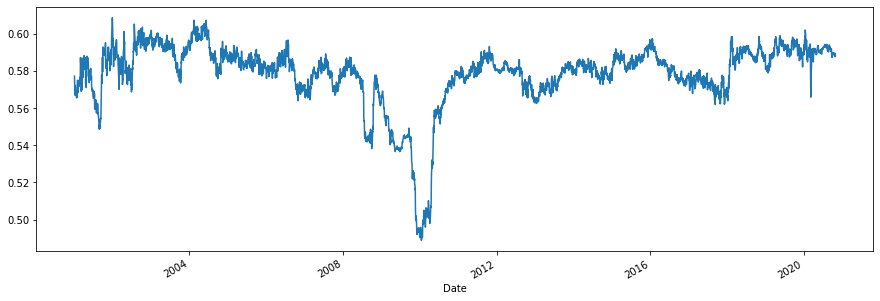

In [15]:
rw_beta_df.median(axis=1).plot(figsize=(15,5)) #somewhat surprisingly little variation ('its the median, stupid')

# Solution A.4: 

**Task:** How many linear factors are necessary to explain at least 80% of variations in cross-sectional betas?


In [23]:
pca_beta = PCA().fit(stats.zscore(rw_beta_df))

print(np.cumsum(pca_beta.explained_variance_ratio_)[:10]) 
#note: beta is the product of correlation times sigma_i / sigma_f
## absence of low factor structure can arise from correlation or sigma_i

[0.26520594 0.39794974 0.5193919  0.59970729 0.64848923 0.69196667
 0.73035239 0.76132836 0.7916664  0.81629385]


# Solution A.5:

**Task:** **A.5** Compute for all firms and for all time points the relative amount of systematic risk that is embedded in each stock's return. Use the pandas.describe() function to get a feeling for the dispersion of betas for firms. How realistics are results in your view?
$$
\\
$$

$$
Var_{t-1}(r_t) = \beta^2_{t-1} \times Var_{t-1}(f_t) + Var_{t-1}(\epsilon_t), \qquad R^2_t:= \frac{\beta^2_{t-1} \times Var_{t-1}(f_t) }{\beta^2_{t-1} \times Var_{t-1}(f_t) + \sigma^2_{\epsilon}}
$$
 

## Merger of  Vol( PC1_r ), PC1_r,  and beta and r onto same Date

### Get Vol of PC1_r

In [28]:
SVM_PC1r = QLSV(PC1_r).fit(cov_type='robust')

PC1r_vol = pd.DataFrame(index=r.index)
PC1r_vol['Vol_f'] = np.exp(SVM_PC1r.smoothed_state[0]/2)

/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


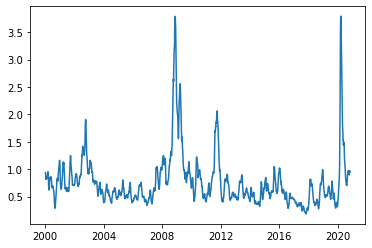

In [29]:
plt.plot(r.index, PC1r_vol["Vol_f"])

In [26]:
d1_df = pd.merge(rw_beta_df, pd.DataFrame(data=PC1r_vol, index=r.index), on='Date', how='inner')

NameError: name 'PC1r_vol' is not defined

### Merge Vol(PC1_r), r, beta, PC1_r onto SAME Date

In [32]:
#merge beta and Vol(PC1_r)=Vol(f)
d1_df = pd.merge(rw_beta_df, pd.DataFrame(data=PC1r_vol, index=r.index), on='Date', how='inner')

beta_algn_df = d1_df.iloc[:,0:r.shape[1]]
PC1r_vol_algn_df = d1_df.iloc[:,r.shape[1]:]

In [33]:
#merge above with r
d2_df = pd.merge(beta_algn_df, r, on='Date', how='inner')

r_algn_df = d2_df.iloc[:,r.shape[1]:]

In [34]:
#merge above with PC1_r=f
d3_df = pd.merge(PC1r_vol_algn_df, PC1_r.iloc[:,0], on='Date', how='inner')

PC1_r_algn_df = d3_df.iloc[:,-1]

### Get epsilon = z(r) - beta * PC1_r

In [35]:
z_r_algn_df = pd.DataFrame(stats.zscore(r_algn_df), index=r_algn_df.index, columns=beta_algn_df.columns)

eps_algn_df = pd.DataFrame(index=r_algn_df.index, columns=beta_algn_df.columns)
for i in range(0,beta_algn_df.shape[1]):
    eps_algn_df.iloc[:,i] = z_r_algn_df.iloc[:,i] - beta_algn_df.iloc[:,i] * PC1_r_algn_df

### Get Vol(epsilon)

Note: epsilon is not mean zero bc of rolling window 

- Runs for roughly 2sec for firm = 800sec = 13min. To save time load Var_tm1_epst.csv

In [37]:
##SVM onto eps_algn_df

#Var_tm1_epst = pd.DataFrame(index=eps_algn_df.index)

#for ticker in eps_algn_df:
   
#    SVM_ = QLSV( eps_algn_df[ticker] - eps_algn_df[ticker].mean()).fit(cov_type='robust')
#    Var_tm1_epst[ticker] = np.exp(SVM_.smoothed_state[0]/2)

#Var_tm1_epst.to_csv('Var_tm1_epst.csv')

/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has

/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has

/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has

/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has

/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has

/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has

/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has

/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has

/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has

/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has

/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has

/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has

/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has

In [41]:
Var_tm1_epst.to_csv = pd.read_csv('Var_tm1_epst.csv', parse_dates=['Date'], index_col = 0)

### Get Conditional R2 (conditional systematic risk)
$$
\\
$$

Notice: Time-varying Systematic Risk = Time-varying Explainable Risk = R2

In [42]:
# Get R2_t i.e. (time-varying systematic risk = time-varying explainable risk)

cond_CAPM_R2 = pd.DataFrame(index=beta_algn_df.index, columns=beta_algn_df.columns)

for j in range(0, beta_algn_df.shape[1]):
    cond_CAPM_R2.iloc[:,j] = beta_algn_df.iloc[:,j]**2 * PC1r_vol_algn_df.iloc[:,0]**2 / ( beta_algn_df.iloc[:,j]**2 * PC1r_vol_algn_df.iloc[:,0]**2 + Var_tm1_epst.iloc[:,j])


In [43]:
cond_CAPM_R2.describe()

,MMM,ABT,ABMD,ATVI,ADBE,AMD,AES,AFL,A,APD,...,WDC,WY,WHR,WMB,XEL,XRX,XLNX,YUM,ZBRA,ZION
count,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,...,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,0.368135,0.216531,0.144499,0.188690,0.259383,0.198326,0.188558,0.295149,0.282866,0.346279,...,0.186443,0.282973,0.301057,0.203618,0.175112,0.230952,0.253950,0.243904,0.235378,0.258925
std,0.176514,0.146565,0.108204,0.131385,0.148237,0.134206,0.142890,0.185446,0.144721,0.162862,...,0.126042,0.169294,0.150819,0.154900,0.151534,0.140444,0.149057,0.155106,0.144592,0.149995
min,0.021460,0.005331,0.007599,0.021991,0.019421,0.019387,0.009684,0.028919,0.038586,0.066751,...,0.020568,0.026504,0.033164,0.019407,0.002121,0.020555,0.014366,0.017874,0.032647,0.047033
25%,0.230783,0.100933,0.064814,0.088202,0.147138,0.103916,0.086445,0.146505,0.174891,0.226363,...,0.109936,0.156630,0.189925,0.095668,0.063122,0.132417,0.149337,0.125544,0.139801,0.148070
50%,0.339069,0.180992,0.118200,0.155421,0.225362,0.162472,0.149366,0.250613,0.260397,0.309951,...,0.151200,0.240455,0.269331,0.149792,0.131564,0.200584,0.213513,0.204357,0.200906,0.222944
75%,0.500047,0.294930,0.191670,0.248836,0.336249,0.261775,0.256304,0.410633,0.353903,0.440738,...,0.222495,0.365703,0.392904,0.264864,0.242004,0.301806,0.319148,0.320794,0.292901,0.332218
max,0.882949,0.853359,0.631643,0.758692,0.851217,0.805575,0.830452,0.882286,0.862866,0.927088,...,0.863690,0.928365,0.869267,0.773983,0.820919,0.823958,0.802084,0.823302,0.865865,0.846833


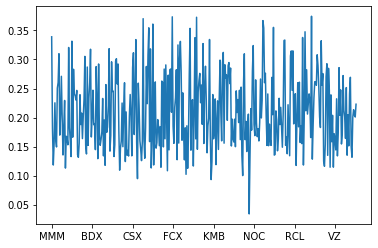

In [47]:
cond_CAPM_R2.median().plot() #I am a bit surprised it is still lower than 40%

# Solution A.6

**Task**: **A.6** Use results from **A.2** to compute time-varying correlations. How many PCs are necessary to drive at least 70% of variations in cross-sectional correlations. When plotting the first principal component of correlations, can you spot why industry says 'diversification disappears when you need it most'?
$$
\\
$$

Verify or remember: 
$$
\sqrt{R^2} = abs(\rho)
$$

for a one-factor model. Fortunately, as correlations among equity is rarely zero, the abs(.) is not that problematic. Double check: if all betas are positive, the correlations are positive.

### Get Correlation from R2

In [48]:
cond_CAPM_rho = np.sqrt(cond_CAPM_R2) #works only b/C 'all' betas were positive

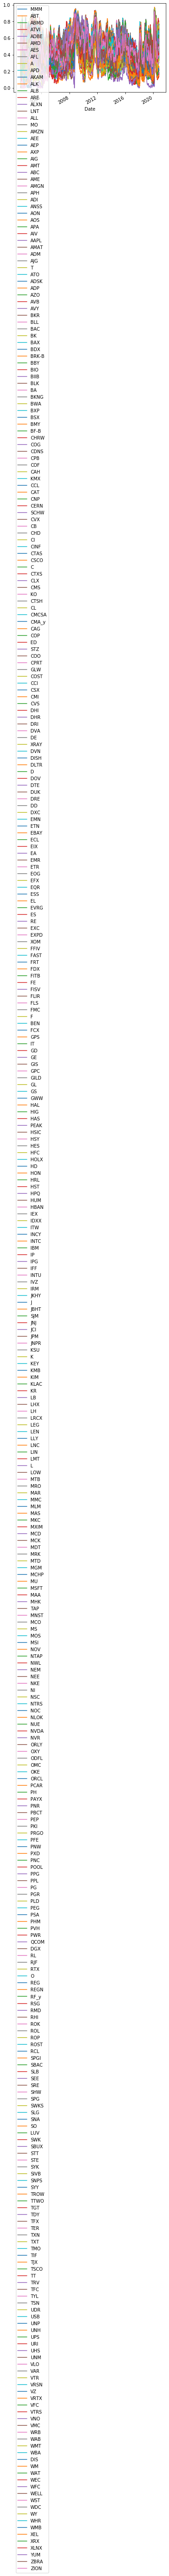

In [49]:
cond_CAPM_rho.plot()

In [50]:
n=2
pca_rho = PCA(n_components=n)
pca_rho.fit(stats.zscore(cond_CAPM_rho))

print(np.cumsum(pca_rho.explained_variance_ratio_))

[0.7089746  0.78458618]


In [51]:
PC1_rho = stats.zscore(pca_rho.transform(stats.zscore(cond_CAPM_rho))[:,0])

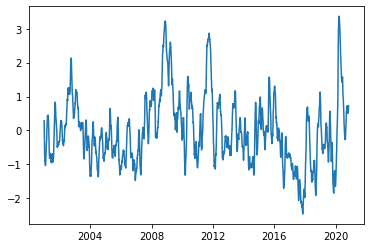

In [52]:
plt.plot(r_algn_df.index,PC1_rho) #correlations rise during turmoil

#### Observation:

1. Correlations follow a one factor model with an R2 of 70%. Vilkov et al. (option correlation paper) work with that assumption

$$
\rho_{i,f,t} \approx \text{affine}( PC1(\rho_{t}) \qquad \forall \rho_{i,f,t} \in \rho_t
$$

2. The saying 'correlations converge to one during crisis times' is supported in our data

3. Crash savvy risk firms are firms with a correlation that is lowest during market turmoil. 


# Solution: A7

**Task** **A.7** Define a crash subset to be periods that coincide with periods of 3 and more standard deviations in the underlying first principal component of return volatility. Use this definition of a crash to find the single firm that has the lowest correlation with the market during periods of market crashes. What is the business model of that firm? How realistic is the finding in your opinion?

### SUBSET: Crash Periods 

- defined by periods where vol of market is above the 3-rd stdev

In [53]:
trigger=3
crash_trigger = PC1r_vol.std()*trigger


In [54]:
PC1_r_vol_CRASHPeriods = PC1r_vol_algn_df[PC1r_vol_algn_df>crash_trigger].dropna()

### Which firm has lowest return correlation during Crash periods?

In [55]:
cond_CAPM_rho_CRASHPeriods = cond_CAPM_rho.loc[PC1_r_vol_CRASHPeriods.index]

cond_CAPM_rho_CRASHPeriosd_sorted = cond_CAPM_rho_CRASHPeriods[cond_CAPM_rho_CRASHPeriods.median().sort_values().index]

cond_CAPM_rho_CRASHPeriosd_sorted.describe()

,NEM,HRL,DVA,ALXN,REGN,KSU,DLTR,VRTX,CAG,CPB,...,PPG,IVZ,EFX,RJF,PCAR,ITW,EMR,DOV,BEN,TROW
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,...,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,0.361222,0.597011,0.588695,0.589791,0.581439,0.589047,0.603252,0.621132,0.601295,0.607921,...,0.861395,0.861644,0.858802,0.864652,0.864677,0.864601,0.874926,0.871159,0.870290,0.896526
std,0.165878,0.121740,0.096578,0.118731,0.147710,0.105799,0.132492,0.120834,0.108715,0.119583,...,0.051270,0.057163,0.061028,0.057755,0.059586,0.062545,0.033273,0.055103,0.067266,0.044821
min,0.000172,0.400600,0.379186,0.363335,0.227578,0.396584,0.300632,0.382512,0.396211,0.313769,...,0.738484,0.717580,0.689649,0.713630,0.695692,0.703701,0.773430,0.742670,0.658522,0.788026
25%,0.267227,0.498538,0.529226,0.513492,0.495550,0.490644,0.509590,0.525182,0.519963,0.539244,...,0.826795,0.822850,0.819821,0.833104,0.841290,0.822587,0.852105,0.835719,0.859564,0.867497
50%,0.369406,0.579454,0.584872,0.585584,0.585979,0.589588,0.599724,0.607500,0.609805,0.611362,...,0.875022,0.875216,0.875856,0.876983,0.877953,0.877987,0.878007,0.878689,0.885023,0.907855
75%,0.493569,0.708597,0.640903,0.678264,0.690055,0.684618,0.737991,0.727641,0.671884,0.687273,...,0.899901,0.907118,0.905492,0.908587,0.909338,0.914618,0.900029,0.912804,0.910621,0.929664
max,0.699223,0.818138,0.848021,0.857534,0.820749,0.796943,0.832404,0.843122,0.902100,0.824315,...,0.943653,0.950629,0.942518,0.944568,0.945133,0.963819,0.946884,0.956409,0.957743,0.972472


**Observation**

- NEM has the lowest correlation with the market during crashes. Looking up the ticker at Yahoo Finance reveals it is a gold mining company https://finance.yahoo.com/quote/NEM/profile?p=NEM

- Gold is said to be a recession hedge. Nice to see in data that basic material firms show lowest correlation during crisis times.

### Visualize Return and Vol of NEM

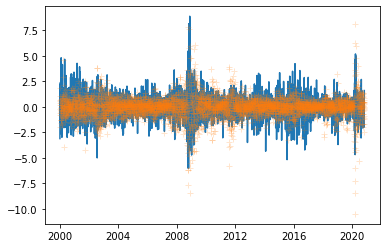

In [56]:
plt.figure()
plt.plot(r.index, stats.zscore(r["NEM"]))
plt.plot(r.index, PC1_r, '+', alpha=0.2) #when market crashes, NEM crashes less than average

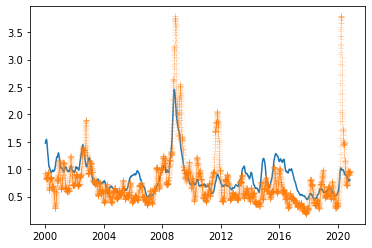

In [57]:
SVM_NEM = QLSV(stats.zscore(r["NEM"])).fit(cov_type='robust')
NEM_vol = np.exp(SVM_NEM.smoothed_state[0]/2)

plt.figure
plt.plot(r.index, NEM_vol)
plt.plot(r.index, PC1r_vol, '+', alpha=0.2) #when market outlook is uncertain, NEM's uncertainty remains rather cool